In [1]:
import sys
sys.path.append('..')
import nbimport 
nbimport.initialize()

In [2]:
from Stat_11 import *
css_styling()

# Sandsynlighed og estimater

# Likelihood and Estimates

## Formål 

- At formulerer begrebet om en _sandsynlighedsfunktion_ 
- At introducerer hypotese test via _sandsynlighedsforholdet_ 
- At bruge maksimering sandsynlighedsfunktionen til at estimerer parametre 


## Purpose

- To formulate the concept of a _likelihood function_
- Introducing hypothesis testing via _likelihood ratio_
- To use the maximization of the likelihood function to estimate parameters

## Introduktion 

Med en _sandsynlighed_ (engl. _likelihood_) mener vi chancen for at noget af tilfældet.  Tidligere har vi snakket om _sandsynlighedsfordelinger_ (PDF) forstået som en funktion $f_X: \Omega\rightarrow\mathbb{R}$, for en tilfældig variabel $X$, der udtrykker hvor sandsynligt alle udfald $x\in\Omega$ er.  Med _sandsynlighed_ vender vi blikket om og bestemmer hvor sandsynligt et _givet_ udfald er. Formelt udtrykker vi det med en _sandsynlighedsfunktion_ (engl. _likelihood function_) $\mathcal{L}: \Omega\rightarrow\mathbb{R}$, og vi skriver sandsynligheden for udfaldet $x\in\Omega$ som 

$$\mathcal{L}(x)$$ 

The probability function $\mathcal{L}$ as such is a fairly basic concept and we can often formulate it based on data and an assumption about the distribution of data.

## Introduction

By a _likelihood_ we mean the chance of something being the case. Previously, we talked about _probability distributions_ (PDF) understood as a function $f_X: \Omega\rightarrow\mathbb{R}$, for a random variable $X$ that expresses how likely all outcomes $x\in\Omega$ are. With _likelihood_ we turn our point of view and determine how likely a _given_ outcome is. Formally, we express it with a _likelihood function_  $\mathcal{L}: \Omega\rightarrow\mathbb{R}$, and we write the likelihood of the outcome $x\in\Omega$ as

$$\mathcal{L}(x)$$

The likelihood function $\mathcal{L}$ is as such a very fundamental concept, and we can often formulate one from data and an assumption of the distribution of data. 

## Sandsynlighedsfunktion 

Hvis vi antager at udfaldene 

$$x=\{x_1,x_2,\ldots,x_n\}\subseteq\Omega$$ 

er uafhængige og at sandsynlighedsfordelingen af $x_i$ er givet ved $f:\Omega\rightarrow\mathbb{R}$ så kan vi skrive sandsynligheden for udfaldet $x$ som 

$$\mathcal{L}(x) = \prod_{i=1}^{N}f(x_i)\quad.$$ 

Intuitivt giver det mening i den forstand at sandsynligheden for udfaldene $x$ er sandsynligheden for de enkelte udfald ganget sammen. 

## Likelihood function

Assuming that the outcomes

$$x=\{x_1,x_2,\ldots,x_n\}\subseteq\Omega$$

are independent and that the probability distribution of $x_i$ is given by $f:\Omega\rightarrow\mathbb{R}$ then we can write the likelihood of the outcome $x$ as

$$\mathcal{L}(x) = \prod_{i=1}^{N}f(x_i)\quad.$$

Intuitively, it makes sense in the sense that the probability of the outcomes $x$ is the probability of the individual outcomes multiplied together.

### Eksempel: 10 rul af en terning

Vi illusterer det med et enkelt eksempel.  Vi har slået 10 slag med en 6-sidet terning, for eksempel  

### Example: 10 rolls of a die 

We illustrate this with a simple example. We've made 10 throws of a 6-sided die, for example

In [3]:
from numpy.random import seed, randint 

seed(11) # For reproducibility
throws = randint(1,7,size=10)
print(throws)

[2 1 4 2 6 5 2 3 1 6]


Sandsynligheden for dette udfald er bestemt ved produktet af de enkelte sandsynligheder for hvert slag.  Sandsynlighedsfordelingen er (givet at terningen er reel) 

$$f_{\text{6-sided die}}(x) = \begin{cases} \frac{1}{6} & x\in[1,2,\ldots,6]\\ 0 & \text{otherwise}\end{cases}\quad,$$ 

hvilket er uafhængig af $x$, og vi finder at 

$$\mathcal{L}(\{x_1,\ldots,x_N\}) = \prod_{i=1}^{N}\frac{1}{6} = \left(\frac{1}{6}\right)^N\quad,$$ 

og specifikt 

The likelihood of this outcome is determined by the product of the individual probabilities of each throw. The probability distribution is (given that the die is fair)

$$f_{\text{6-sided die}}(x) = \begin{cases} \frac{1}{6} & x\in[1,2,\ldots,6]\\ 0 & \text{otherwise}\end{cases}\quad,$$

which is independent of $x$ and we find that

$$\mathcal{L}(\{x_1,\ldots,x_N\}) = \prod_{i=1}^{N}\frac{1}{6} = \left(\frac{1}{6}\right)^N\quad,$$

and specifically

In [4]:
print(f'Likelihood of throws: {1/6**len(throws):.2g}')

Likelihood of throws: 1.7e-08


Lad os nu antage, at terningen _ikke_ er reel.  Det vil sige, at udfaldet 6, for eksempel, er mere sandsynligt end 2,3,4, og 5, og det modsate udfald, 1, er mindre sandsynligt (terningen har en lille bly-klump tæt på den side med 1 på).  Under den antagelse, er sandsynlighedsfordelingen 

$$f_{\text{6-sided loaded die}}(x) = 
\begin{cases} 
  \frac{2(1-a)}{12} & x = 1\\
  \frac{1}{6} & x\in[2,3,4,5]\\
  \frac{2(1+a)}{12} & x = 6\\
  0 & \text{otherwise}
\end{cases}\qquad 0\leq a \leq 1\quad,$$

hvor $a$ altså udtrykker graden af _hvor_ skæv terningen er.  For $a=0$ finder vi at sandsynligheden for 1 og 6 er $1/6$, mens for $a=1$ er sandsynlighederne henholdvis $0$ og $4/12=1/3$.  Lad os sætte $a=1/2$ og beregne sandsynligheden for vores 10 kast 

Now suppose the die is _not_ fair. That is, the outcome 6, for example, is more likely than 2,3,4, and 5, and the opposite outcome, 1, is less likely (the die has a small lead lump close to the side with 1 on). Under that assumption, the probability distribution is

$$f_{\text{6-sided loaded die}}(x) = 
\begin{cases} 
  \frac{2(1-a)}{12} & x = 1\\
  \frac{1}{6} & x\in[2,3,4,5]\\
  \frac{2(1+a)}{12} & x = 6\\
  0 & \text{otherwise}
\end{cases}\qquad 0\leq a \leq 1\quad,$$

where $a$ expresses the degree of _how_ unfair the die is. For $a=0$, we find that the probability of 1 and 6 is $1/6$, while for $a=1$ the probabilities are $0$ and $4/12=1/3$ respectively. Let us set $a=1/2$ and calculate the likelihood of our 10 throws

In [5]:
from numpy import multiply
a = 1/2
p = {1: 2*(1-a)/12, 2: 1/6, 3: 1/6, 4: 1/6, 5: 1/6, 6: 2*(1+a)/12}
print('Likelihood of throws given a=1/2: {:.2g}'
      .format(multiply.reduce([p[t] for t in throws])))

Likelihood of throws given a=1/2: 9.3e-09


Lidt afhængigt af hvilke tal vi fik, så ser vi at sandsynligheden for at terningen ikke er reel er _mindre_ end at terningnen _er_ reel.  

A little depending on what numbers we got, we see that the probability that the die is unfair is _less_ than the die _is_ fair.

## Maksimale sandsynligheds estimat (MLE)

Vi kan vende problem om endnu en gang og spørge, givet vores udfald (eller prøve), hvilken værdi af $a$ giver den største sandsynlighed.  Det leder os hen til begrebet om _Maksimal Sandsynligheds Estimatorer_ (engl. _Maximum Likelihood Estimators_ eller MLE).  Antag vi har en prøve $X=\{x_1,\ldots,x_N\}$ der er trukket fra en given sandsynlighedsfordeling $f$ med ukendt parameter (eller parametre) $\theta$.  Da er $\hat\theta$ givet ved 

$$\mathcal{L}(X,\hat\theta)=\max_{\Theta} \mathcal{L}(X,\theta) = \max_{\Theta}\prod_{i=1}^{N}f(x_i,\theta)\quad\theta\in\Theta\quad,$$

en _estimator_ af den ukendte $\theta$.  Her betyder $\max_{\Theta}$ den maksimale værdi over de mulige værdier $\Theta$ af parameteren $\theta$. 

## Maximum likelihood estimate (MLE)

We can turn the problem around again and ask, given our outcome (or sample), what value of $a$ gives the highest probability. This leads us to the concept of _Maximum Likelihood Estimators_ (MLE). Suppose we have a sample $X=\{x_1,\ldots,x_N\}$ that is taken from a given probability distribution $f$ with unknown parameter (or parameters) $\theta$. Then $\hat\theta$ given by

$$\mathcal{L}(X,\hat\theta)=\max_{\Theta} \mathcal{L}(X,\theta) = \max_{\Theta}\prod_{i=1}^{N}f(x_i,\theta)\quad\theta\in\Theta\quad,$$

is an _estimator_ of the unknown $\theta$. Here, $\max_{\Theta}$ means the maximum value over all possible values of the parameter $\theta$ in $\Theta$.

Lige om lidt vil vi bruge det på vores 10 kast med en terning, men først bemærker vi at 

$$\log\prod_{i=1}^{N} x_i = \sum_{i=1}^{N} x_i\quad,$$ 

og, da $\log x,\,x\in(0,\infty)$ er _strengt voksende_ gælder at $f(x)$ og $\log f(x)$ er maksimal for samme $x$.  Vi kan derfor finde hvor $\mathcal{L}$ er maksimal ved af finde hvor $\log \mathcal{L}$ er maksimal, og vi har at $\hat\theta$ er givet ved 

$$\ell(x,\hat\theta) = \log \mathcal{L}(X,\hat\theta) = \max_{\Theta}\left[\sum_{i=1}^{N}\log f(x_i,\theta)\right]\quad\theta\in\Theta\quad,$$ 

hvilket ofte er lettere at arbejde med da vi har en sum snarer end et produkt.  Dette er en meget almindelig konstruktion og kaldes den _logaritmiske sandsynlighed_ (engl. _log-likelihood_ eller LLH). Desuden har vi, igen da $\log x$ er strengt voksende at $\log f(x)$ er maksimal hvor $-\log f(x)$ er _minimal_.   Vi har derfor at $\hat\theta$ er givet ved 

$$-\ell(X,\hat\theta) = -\log \mathcal{L}(X,\hat\theta) = \min_{\Theta}\left[-\sum_{i=1}^{N}f(x_i,\theta)\right]\quad\theta\in\Theta\quad.$$ 

Vi kan altså finde $\hat\theta$ ved at _minimerer_ den _negative_ logaritmiske sandsynlighed.  I praksis er det attraktivt da det er nemmere at formulerer numeriske algoritmer der finder minimum end det er at finde maksimum. 

In a moment we will use this on our 10 rolls with a die, but first we notice that

$$\log\prod_{i=1}^{N} x_i = \sum_{i=1}^{N} x_i\quad,$$

and, since $\log x,\,x\in(0,\infty)$ is _strictly increasing_, then $f(x)$ and $\log f(x)$ have maximum at the same $x$. We can therefore find where $\mathcal{L}$ is maximum by finding where $\log\mathcal{L}$ is maximum and we have that $\hat\theta$ is given by

$$\ell(x,\hat\theta) = \log \mathcal{L}(X,\hat\theta) = \max_{\Theta}\left[\sum_{i=1}^{N}\log f(x_i,\theta)\right]\quad\theta\in\Theta\quad,$$

which is often easier to work with as we have a sum of rather than a product. This is a very common construct and is called the _log-likelihood_ (LLH). Furthermore, since $\log x$ is strictly growing then $\log f(x)$ is maximum where $-\log f(x)$ is _minimum_. We therefore have $\hat\theta$ given by

$$-\ell(X,\hat\theta) = -\log \mathcal{L}(X,\hat\theta) = \min_{\Theta}\left[-\sum_{i=1}^{N}f(x_i,\theta)\right]\quad\theta\in\Theta\quad.$$

Thus, we can find $\hat\theta$ by _minimizing_ the _negative_ logarithmic likelihood. In practice, this is attractive as it is easier to formulate numerical algorithms that find the minimum rather than to find the maximum.

### Eksempel: Undersøgelse af terning 

Lad os nu vende tilbage til vores 10 terningkast ovenover og finde det $a$ som maksimerer sandsynligheden.  Det vil vi gøre ved at _minimere_ den negative, logaritmiske sandsynlighed 

### Example: Investigating the die 

Now let's return to our 10 die rolls above and find the $a$ that maximizes the likelihood. We will do this by _minimizing_ the negative, logarithmic probability

In [6]:
def llh(a,throws=throws):
    from numpy import sum, log
    return sum([log(1/6 if t in [2,3,4,5] else 
                     2*(1-a)/12 if t == 1 else 
                     2*(1+a)/12 if t == 6 else 0) 
                for t in throws])

from scipy.optimize import minimize_scalar

opt = minimize_scalar(lambda a: -llh(a),bounds=(0,1),method='Bounded')
print(f'Estimate of a: {opt.x:.3g}')

Estimate of a: 4.37e-06


Vi ser, at givet vores 10 kast, at $\hat a \approx 0$, svarende til at vores terning er reel.  Lad os nu lave 50 kast med en terning der _ikke_ er reel, med $a=1/2$, og lad os forsøge at estimerer $a$ ud fra den prøve

We see that given our 10 throws, that $\hat a \approx 0$, corresponding to a fair die. Now let us make 50 rolls with a die that is _not_ fair, with $a=1/2$, and let us try to estimate $a$ based on that sample

In [7]:
from numpy import ones,arange
from numpy.random import choice
a      = 1/2
p      = ones(6)/6 
p[0]   = 2*(1-a)/12
p[5]   = 2*(1+a)/12
throws = choice(arange(1,7),p=p,size=50)
opt    = minimize_scalar(lambda a:-llh(a,throws),bounds=(0,1),method='Bounded')
print(f'Estimate of a: {opt.x:.2f} versus true a: {a}')

Estimate of a: 0.42 versus true a: 0.5


Alt efter hvilke tilfældige kast vi genererede ovenover finder vi $\hat a\approx 0.5$.  

Depending on what random throws we generated above, we find $\hat a\approx 0.5$.

## Sandsynlighedsforhold og hypotese test

## Likelihood ratio and hypothesis testing

### Eksempel: Er terningen reel?

Givet vores kast med en ikke-reel terning, lad os sammenligne _hypoteserne_ 

- $H_1$: terningen er _ikke_ reel med $a\neq 0$ 
- $H_0$: terningen _er_ reel med $a=0$

Det gør vi ved at beregne _sandsynlighedsforholdet_ (engl. _likelihood ratio_) som 

$$\lambda = 2\log\frac{\mathcal{L}(H_1)}{\mathcal{L}(H_0)} = 2\log\frac{\mathcal{L}(x,a=\hat a)}{\mathcal{L}(x,a=0)}
= 2\left(\ell(x,a=\hat a) - \ell(x,a=0)\right)\quad,$$ 

hvor vi allerede har fundet $-\ell(x,a=\hat a)$ da vi minimerede ovenover. 

### Example: Is the die fair 

Given our throw with an unfair die, let us compare the _hypotheses_

- $H_1$: the cube is _unfair_ with $a\neq 0$
- $H_0$: the cube is _fair_ with $a=0$

We do this by calculating the _likelihood ratio_ as

$$\lambda = 2\log\frac{\mathcal{L}(H_1)}{\mathcal{L}(H_0)} = 2\log\frac{\mathcal{L}(x,a=\hat a)}{\mathcal{L}(x,a=0)}
= 2\left(\ell(x,a=\hat a) - \ell(x,a=0)\right)\quad,$$

where we've already found $-\ell(x,a=\hat a)$ when we minimized above.

In [8]:
def likelihood_ratio(lh_h1,lh_h0,loglike=True):
    from numpy import log 
    
    if loglike:
        return 2 * (lh_h1-lh_h0)
    return 2 * (log(lh_h1)-log(lh_h0))

In [9]:
from numpy import log

llh0 = len(throws) * log(1/6)
llh1 = -opt.fun
lamb = likelihood_ratio(llh1,llh0)
print(f'Likelihood ratio λ: {lamb:.2f}')

Likelihood ratio λ: 4.30


Man kan vise at $\lambda$ er en statistik med sandsynlighedsfordelingen $\chi^2_{\nu}$ hvor $\nu$ er antallet af frihedsgrader.  Her har vi én frihedsgrad i $H_1$ i form af $\hat a$, mens $H_0$ har ingen frihedsgrader, så total set har vi 

$$\nu = \nu_{H_1} - \nu_{H_0} = 1 - 0 = 1\quad.$$ 

One can show that $\lambda$ is a statistic with the probability distribution $\chi^2_{\nu}$ where $\nu$ is the number of degrees of freedom. Here we have one degree of freedom in $H_1$ in the form of $\hat a$, while $H_0$ has no degrees of freedom, so overall we have

$$\nu = \nu_{H_1} - \nu_{H_0} = 1 - 0 = 1\quad.$$

### $p$-værdi 

Statistikken $p$-værdi udtrykker hvor sandsynlig det er, givet en antagelse, at vi finder noget som er _værrer_ (passer dårligere med hypotesen) end hvad vi har fundet.  Da sandsynlighedsforholdet $\lambda$ er $\chi^2_\nu$-fordelt kan vi beregne $p$-værdien givet ved 

$$ p = P(\chi^2_\nu > \lambda)\quad,$$ 

for hvilket der _typisk_ gælder 

\begin{align*}
\text{evidence against $H_0$} &= 
\begin{cases}
  \phantom{10\%\leq{}} p < 1\% & \text{very strong}\\
  \phantom{0}1\% \leq p < 5\% & \text{strong}\\
  \phantom{1}5\% \leq p < 10\% & \text{weak}\\
  10\% \leq p & \text{none}
\end{cases}\quad.
\end{align*}

### $p$ value

The $p$ value statistic expresses how likely it is, assuming that we find something that is _worse_ (fits worse with the hypothesis) than what we found. Since the probability ratio $\lambda$ is $\chi^2_\nu$ distributed, we can calculate the $p$ value given by

$$ p = P(\chi^2_\nu > \lambda)\quad,$$

for which _typically_ applies

\begin{align*}
\text{evidence against $H_0$} &= 
\begin{cases}
  \phantom{10\%\leq{}} p < 1\% & \text{very strong}\\
  \phantom{0}1\% \leq p < 5\% & \text{strong}\\
  \phantom{1}5\% \leq p < 10\% & \text{weak}\\
  10\% \leq p & \text{none}
\end{cases}\quad.
\end{align*}

### Eksempel: Terningen er ikke reel 

Lad os beregne $p$-værdien af $\lambda$ som givet oven over. 

### Example: The die is not fair 

Let us calculate the $p$ value of $\lambda$ as given above.

In [10]:
from scipy.stats import chi2

p = chi2.sf(lamb,1)
print(f'p-value of λ={lamb:.2f}: {p*100:.3g}%')

p-value of λ=4.30: 3.82%


Vi ser at vi får en $p$-værdi på $\approx4\%$, hvorfor vi kan forkaste $H_0$ med stærk evidens - altså at terningen nok ikke er reel.  Havde vi i stedet fået $p>10\%$, er det _ikke_ det samme som at sige at $H_0$ er _korrekt_.  Det ville blot betyde at vores test ikke kan sige om $H_0$ er _forkert_. 

We see that we get a $p$ value of $\approx4\%$, which means we can reject $H_0$ with strong evidence - the die is probably _unfair_. If we had gotten $p>10\%$ instead, it is _not_ the same as saying that $H_0$ is _correct_. It would simply mean that our test can't say if $H_0$ is _wrong_.

### Eksempel: Mendels bønner - tidlig genetik

Lad os tage et andet eksempel: [Gregory Mendel](https://en.wikipedia.org/wiki/Gregor_Mendel) undersøgte nedarvning af træk ved at studerer ærter. Han havde gule glatte bønner som han "parrede" med runkede grønne bønner, og fandt følgende udfald 

| $x_i$      | **Gul** | **Grøn** |
| -----------| ------- | -------- |
| **Glat**   | 315     |   108    | 
| **Runket** | 101     |   32     |

i alt $n=556$ forsøg. Hans hypostese var, at trækkene skulle sprede sig med sandsynlighederne 


| $p^0_i$    | **Gul** | **Grøn** |
| -----------| ------- | -------- |
| **Glat**   | 9/16    |   3/16   | 
| **Runket** | 3/16    |   1/16   |

Vi beregner sandsynligheden af observationerne $X$ givet sandsynlighederne $p_0$ og for $\hat p = X/n$ hvor sandsynlighedsfordelingen er givet ved en multi-nominal fordeling 

$$P(x,p) = n!\prod_{i=1}^{N}\frac{p_i^{x_i}}{x_i!}\quad,$$ 

### Example: Mendel's peas - early genetics

Let us take another example: [Gregory Mendel](https://en.wikipedia.org/wiki/Gregor_Mendel) investigated the inheritance of traits in studying peas. He had yellow smooth beans which he "paired" with wrinkled green beans, and found the following outcome

| $x_i$        | **Yellow** | **Green** |
| ------------ | ---------- | --------- |
| **Smooth**   | 315        | 108       |
| **Wrinkled** | 101        | 32        | 

total of $n=556$ trials. His hypothesis was that the traits should spread with the probabilities


| $p^0_i$      | **Yellow** | **Green** |
| ------------ | ---------- | --------- |
| **Smooth**   | 9/16       | 3/16      |
| **Wrinkled** | 3/16       | 1/16      |

We calculate the probability of the observations $X$ given the probabilities $p_0$ and for $\hat p = X/n$ where the probability distribution is given by a multi-nominal distribution

$$P(x,p) = n!\prod_{i=1}^{N}\frac{p_i^{x_i}}{x_i!}\quad,$$

In [11]:
from sympy import symbols, IndexedBase, Function, Symbol, factorial, Product, S, Eq 

i, N, n, x = symbols('i N n x',integer=True,positive=True)
p0 = IndexedBase('p_0')
p1 = IndexedBase('p_1')
x  = IndexedBase(x)
L  = Function('Lcal')
lr = Symbol('lambda')
P0 = factorial(n)*Product(p0[i]**x[i]/factorial(x[i]),(i,S.One,N))
P1 = factorial(n)*Product(p1[i]**x[i]/factorial(x[i]),(i,S.One,N))
Eq(L(p0),P0)

Eq(Lcal(p_0), factorial(n)*Product(p_0[i]**x[i]/factorial(x[i]), (i, 1, N)))

In [12]:
Eq(L(p1),P1)

Eq(Lcal(p_1), factorial(n)*Product(p_1[i]**x[i]/factorial(x[i]), (i, 1, N)))

og dermed forholdet 

and thus the relationship

In [13]:
from sympy import log as sylog 

Eq(lr,2*sylog(P1/P0))

Eq(lambda, 2*log(Product(p_1[i]**x[i]/factorial(x[i]), (i, 1, N))/Product(p_0[i]**x[i]/factorial(x[i]), (i, 1, N))))

som vi kan omskrive 

which we can rewrite

In [14]:
P0t = P0.replace(1/factorial(x[i]),S.One) * P0.replace(p0[i]**x[i],1)
P1t = P1.replace(1/factorial(x[i]),S.One) * P1.replace(p1[i]**x[i],1)
LL = (2*sylog(P1t/P0t).expand(log=True,force=True)).expand(log=True,force=True).simplify()
Eq(lr,Eq(2*sylog(P1t/P0t),LL))

Eq(lambda, Eq(2*log(Product(p_1[i]**x[i], (i, 1, N))/Product(p_0[i]**x[i], (i, 1, N))), 2*Sum((-log(p_0[i]) + log(p_1[i]))*x[i], (i, 1, N))))

Vi kan indsætte Mendels observationer for $x_i$, hans hypotese for $p_{0_i}$, og forholdene $p_{1_i}=x_i/n$.

We can insert Mendel's observations for $x_i$, his hypothesis for $p_{0_i}$, and the ratios $p_{1_i}=x_i/n$.

In [15]:
from numpy import sum

obs  = [315, 101, 108, 32]
hyp  = [9/16, 3/16, 3/16, 1/16]
subs = [{x[ii+1]:oo, p0[ii+1]: hh, p1[ii+1]: oo/sum(obs)}
        for ii,(oo,hh) in enumerate(zip(obs,hyp))]
subs = {k:v for s in subs for k, v in s.items()}
lrat = float(LL.subs(N,len(obs)).doit().evalf(subs=subs))
prob = chi2.sf(lrat,3)
print(f'λ = {lrat:.3f} with p-value = {prob*100:.2f}%')

λ = 0.475 with p-value = 92.43%


Vi kan altså _ikke_ forkaste nul-hypotesen at de antagne sandsynligheder er korrekte. 

We can therefore _not_ reject the null hypothesis that the assumed probabilities are correct.

## Mere om MLE

## More about MLE

### Analytisk beregning af estimator 

Ovenfor brugte vi en numerisk metode til at finde estimatet $\hat a$ af $a$.  I nogle tilfælde er det dog muligt at beregne estimatoren $\hat\theta$ analytisk.  Vi så at $\hat\theta$ er givet ved 

$$\log \mathcal{L}(X,\hat\theta) = \max_{\Theta}\left[\sum_{i=1}^{N}\log f(x_i,\theta)\right]\quad\theta\in\Theta\quad.$$ 

Hvis vi kan beregne den afledte af den logaritmiske sandsynlighedsfunktion $\ell(X,\theta)$, eller ækvivalent af logaritmen af sandsynlighedsfordelingen $\log f(x,\theta)$, så kan vi muligvis løse 

\begin{align*}
  \frac{\mathrm{d}\ell(X,\theta)}{\mathrm{d}\theta} 
  &= \sum_{i=1}^{N}\frac{\mathrm{d}\log f(x_i,\theta)}{\mathrm{d}\theta}\\
  &= \sum_{i=1}^{N}\frac{1}{f(x_i,\theta)}\frac{\mathrm{d}f(x_i,\theta)}{\mathrm{d}\theta}\\
  &= 0\quad.
\end{align*}

### Analytical calculation of estimator

Above we used a numerical method to find the estimate $\hat a$ by $a$. In some cases, however, it is possible to calculate the estimator $\hat\theta$ analytically. We saw that $\hat\theta$ is given by

$$\log \mathcal{L}(X,\hat\theta) = \max_{\Theta}\left[\sum_{i=1}^{N}\log f(x_i,\theta)\right]\quad\theta\in\Theta\quad.$$

If we can calculate the derivative of the  log-likelihood function $\ell(X,\theta)$, or the equivalent of the logarithm of the probability distribution $\log f(x,\theta)$, then we may be able to solve

\begin{align*}
  \frac{\mathrm{d}\ell(X,\theta)}{\mathrm{d}\theta} 
  &= \sum_{i=1}^{N}\frac{\mathrm{d}\log f(x_i,\theta)}{\mathrm{d}\theta}\\
  &= \sum_{i=1}^{N}\frac{1}{f(x_i,\theta)}\frac{\mathrm{d}f(x_i,\theta)}{\mathrm{d}\theta}\\
  &= 0\quad.
\end{align*}

### Eksempel: Radiaktivt henfald 

Antag, for eksempel, at vi i et eksperiment måler tiden $t_i$ mellem radiaktive henfald. Vi vil nu gerne besteme henfaldsraten, eller levetiden $\tau$ af vores radiaktive kilde.  Sandsynlighedsfordelingen er givet ved 

### Example: Radioactive decay 

For example, suppose that in one experiment we measure the time $t_i$ between radiative decay. We would now like to determine the decay rate, or the lifetime $\tau$ of our radioactive source. The probability distribution is given by

In [16]:
from sympy import exp as syexp 

N, i = symbols('N, i',integer=True,positive=True)
t    = IndexedBase('t')
tau  = symbols('tau',real=True,positive=True)
f    = 1/tau * syexp(-t[i]/tau)
Eq(Function('f')(t[i],tau),f)

Eq(f(t[i], tau), exp(-t[i]/tau)/tau)

og vores logaritmiske sandsynlighedsfunktion er 

and our log-likelihood function is

In [17]:
from sympy import UnevaluatedExpr

LLH = sylog(Product(f,(i,S.One,N))).expand(log=True,force=True)
ell = Function('ell')
Eq(UnevaluatedExpr(Eq(ell(tau),LLH)),LLH.expand())

Eq(Eq(ell(tau), Sum(-log(tau) - t[i]/tau, (i, 1, N))), Sum(-t[i]/tau, (i, 1, N)) + Sum(-log(tau), (i, 1, N)))

Vi kan illusterer denne funktion hvor vi sætter $\tau=1$ og $\sum_{i=1}^{N}t_i=1$ så at skalerne ikke har nogen betydning. 

We can illustrate this function where we set $\tau=1$ and $\sum_{i=1}^{N}t_i=1$ so that the scales do not matter.

Maksimum af den logaritmiske sandsynlighed $\ell(\tau)=\log\mathcal{L}(\tau)$.

Maximum of the logarithmic likelihood $\ell(\tau)=\log\mathcal{L}(\tau)$.

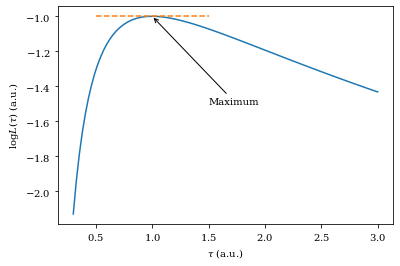

In [18]:
from numpy import linspace, log 
from matplotlib.pyplot import plot,annotate,xlabel,ylabel

taus = linspace(0.3,3,101)
plot(taus,-1/taus-log(taus))
annotate('Maximum',(1,-1-log(1)),xytext=(1.5,-1.5),
         arrowprops=dict(arrowstyle='->'))
plot([.5,1.5],[-1,-1],'--')
ylabel(r'$\log L(\tau)$ (a.u.)')
xlabel(r'$\tau$ (a.u.)');

Vi finder den afledte af denne og sætter til nul

We find the derivative of this and set it to zero

In [19]:
from sympy import Derivative

dLLH = LLH.diff(tau).expand().doit().simplify()
Eq(UnevaluatedExpr(Eq(Derivative(ell(tau),tau),dLLH)),S.Zero)

Eq(Eq(Derivative(ell(tau), tau), (-N + Sum(t[i], (i, 1, N))/tau)/tau), 0)

og vi løser for $\tau$

and we solve for $\tau$

In [20]:
from sympy import solve

Eq(tau,solve(dLLH,tau)[0])

Eq(tau, Sum(t[i], (i, 1, N))/N)

Således ser vi at det bedste estimat af $\tau$ er givet ved middelværdien af observationerne $t_i$. 

Thus, we see that the best estimate of $\tau$ is given by the mean of the observations $t_i$.

### Numerisk beregning af estimator 

Lad os nu forestille os, at vores måleapperatur er sådan at vi ikke kan måle tider større end en grænse $T$.  Da bliver sandsynlighedsfordelingen af $t_i$ givet ved 

### Numerical Calculator Estimator

Now let us imagine that our measuring apparatus is such that we cannot measure times greater than some limit $T$. Then the probability distribution of $t_i$ is given

In [21]:
T  = symbols('T',real=True,positive=True)
g  = f * (1-syexp(-T/tau))**-1
Eq(Function('g')(t[i],tau),g)

Eq(g(t[i], tau), exp(-t[i]/tau)/(tau*(1 - exp(-T/tau))))

og den logaritmiske sandsynlighedsfunktion 

and the log-likelihood function

In [22]:
from sympy import factor_terms

LLH = factor_terms(sylog(Product(g,(i,S.One,N)))
                   .simplify().expand(log=True,force=True)).doit().expand(log=True,force=True)
Eq(ell(tau),LLH)

Eq(ell(tau), -Sum(t[i]/tau, (i, 1, N)) - Sum(log(tau), (i, 1, N)) - Sum(log(1 - exp(-T/tau)), (i, 1, N)))

In [23]:
dLLH = LLH.doit().diff(tau)
Eq(UnevaluatedExpr(Eq(Derivative(ell(tau),tau),dLLH)),S.Zero)

Eq(Eq(Derivative(ell(tau), tau), N*T*exp(-T/tau)/(tau**2*(1 - exp(-T/tau))) - N/tau - Sum(-t[i]/tau**2, (i, 1, N))), 0)

som ikke har nogle analytiske løsninger, og vi er derfor nød til at løse problemet numerisk.  Vi laver en prøve med $\tau=1$ og $T=3$

which does not have any analytical solutions and we therefore need to solve the problem numerically. We generate a sample with $\tau=1$ and $T=3$

Den fulde fordeling af $t$ og fordelingen for $t<T=3$.  Også vist er vores PDF. 

The full distribution of $t$ and the distribution of $t<T=3$. Also shown is our PDF.

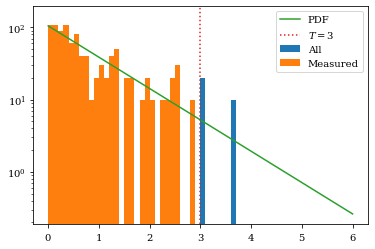

In [24]:
def f(t,tau,limit=3):
    from numpy import exp 
    
    return exp(-t/tau)/(1-exp(-limit/tau))

from numpy.random import exponential
from matplotlib.pyplot import axvline, yscale, legend

tt    = exponential(size=100)
t     = tt[tt<3]
bins  = linspace(0,6,61)
hall  = histogram(tt,bins)
hmeas = histogram(t, bins)
plot_hist(*hall,  label='All',      as_bar=True, ecolor='none')
plot_hist(*hmeas, label='Measured', as_bar=True, ecolor='none')
opts  = dict(bins=x,histtype='step')

plot(bins,len(tt)*f(bins,1,3),label='PDF',color='C2')
yscale('log')
axvline(3,label='$T=3$',color='C3',ls=':')
legend();

Vi ønsker at finde den værdi af $\tau$ som maximerer sandsynligheden af vores prøve, givet antagelsen at $t\sim \mathcal{E}(\tau)$ og at vi har en maksimal værdi $T$ vi kan måle.  Generelt vil vi i stedet for at maksimere sandsynligheden $\mathcal{L}$ _minimere_ den negative logaritmiske sandynlighed $-\log\mathcal{L}=-\ell$.  Vi vil bruge `scipy.optimize.minimize` til dette.  Nogle af de underligende metoder som denne funktion bruger giver os tilbage den inverse Hessian matrix $H^{-1}$ med 

$$H = 
\begin{bmatrix} 
  \frac{\partial^2 f}{\partial x_1^2} & 
  \frac{\partial^2 f}{\partial x_1\partial x_2} &
  \cdots &
  \frac{\partial^2 f}{\partial x_1\partial x_n}\\
  \frac{\partial^2 f}{\partial x_2\partial x_1} & 
  \frac{\partial^2 f}{\partial x_2^2} &
  \cdots &
  \frac{\partial^2 f}{\partial x_2\partial x_n}\\
  \vdots & 
  \vdots &
  \ddots &
  \vdots \\
  \frac{\partial^2 f}{\partial x_n\partial x_1} & 
  \frac{\partial^2 f}{\partial x_n\partial x_2} &
  \cdots &
  \frac{\partial^2 f}{\partial x_n^2}\\
  \end{bmatrix}
  \quad,
  $$
hvor $f$ er den funktion vi minimerer og $x_i$ er de parametre vi minimerer med hensyn til.  Generelt kan man vise at $H^{-1}$ er lig med covariansen $C$, så vi har at estimatet af usikkerhederne på de fundne parametreeværdier er givet ved 

$$\delta_{x_i}^2 = C_{ii} = (H^{-1})_{ii})\quad.$$  

Lad os skrive en funktion der generelt kan estimerer parametre ved hjælp af et maksimalt sandsynligheds estimat. Først definerer vi en funktion til beregning af den logaritmiske sandsynlighed fra en data og en (logaritmisk) PDF

$$\ell(x,\hat\theta) = \sum_{i=1}^{N} \log f(x_i;\hat\theta)\quad.$$

We want to find the value of $\tau$ that maximizes the probability of our sample, given the assumption that $t\sim \mathcal{E}(\tau)$ and that we have a maximum value of $T$ we can measure. In general, instead of maximizing the probability $\mathcal{L}$ _, we minimize_ the negative logarithmic probability $-\log\mathcal{L}=-\ell$. We will use `scipy.optimize.minimize` for this. Some of the underlyingy methods that this function uses give us back the inverse Hessian matrix $H^{-1}$

$$H = 
\begin{bmatrix} 
  \frac{\partial^2 f}{\partial x_1^2} & 
  \frac{\partial^2 f}{\partial x_1\partial x_2} &
  \cdots &
  \frac{\partial^2 f}{\partial x_1\partial x_n}\\
  \frac{\partial^2 f}{\partial x_2\partial x_1} & 
  \frac{\partial^2 f}{\partial x_2^2} &
  \cdots &
  \frac{\partial^2 f}{\partial x_2\partial x_n}\\
  \vdots & 
  \vdots &
  \ddots &
  \vdots \\
  \frac{\partial^2 f}{\partial x_n\partial x_1} & 
  \frac{\partial^2 f}{\partial x_n\partial x_2} &
  \cdots &
  \frac{\partial^2 f}{\partial x_n^2}\\
  \end{bmatrix}
  \quad,
  $$
where $f$ is the function we minimize and $x_i$ are the parameters we minimize with respect to. In general, it can be shown that $H^{-1}$ is equal to the covariance $C$, so we have that the estimate of the uncertainties on the found parameter values is given by

$$\delta_{x_i}^2 = C_{ii} = (H^{-1})_{ii})\quad.$$

We write a function that can in general estimate parameters using a maximum likelihood estimate.  First, however, we define a function to calculate the logarithmic likelihood from a data and a (logarithmic) PDF

$$\ell(x,\hat\theta) = \sum_{i=1}^{N} \log f(x_i;\hat\theta)\quad.$$

In [25]:
def _get_th(fst,*args):  # Remedy of minimize weird calling convention
    def _inner(f,*a):
        return (f,*a)
    
    return _inner(*fst)    

def llh(f,data,*theta,logpdf=False):
    from numpy import log, where, errstate, inf, atleast_1d, isnan
    
    with errstate(all='ignore',invalid='ignore'):
        th = _get_th(*theta)
        p  = atleast_1d(f(data,*th))
        
        if not logpdf:
            p = where(p>0,log(p),-inf)
        
        p[isnan(p)] = -inf
        
        return p.sum(axis=0)

Det andet trin er at definere en funktion, der maksiimerer den logaritmiske sandsynlighed (ved at minimerer den negative logaritmiske sandsynlighed) givet en (logaritmisk) PDF og data

$$x,f,\hat\theta_0 \xrightarrow[\theta\in\Theta]{\min-\ell(x,\theta)}\hat\theta\quad.$$

Vi gør det på denne måde for at kunne genbruge denne funktion senere (se mere om Maksimalt sandsynlighedsestimat i bøtter [her](#Maksimalt-sandsynlighedsestimat-i-bøtter) og om Udvidet maksimalt sandsynlighedsestimat [her](#Udvidet-maksimalt-sandsynlighedsestimat)).

The second step is to define a function that maximizes the logarithmic likelihood (by minimizing the negative logarithmic likelihood) given a (logarithmic) PDF and data

$$x,f,\hat\theta_0 \xrightarrow[\theta\in\Theta]{\min-\ell(x,\theta)}\hat\theta\quad.$$ 

We do it like this to be able to use this function later on (see more about Binned maximum likelihood estimates [here](#Binned-maximum-likelihood-estimates) and Extended maximum likelihood estimates [here](#Extended-maximum-likelihood-estimates)). 

In [26]:
def _extract_mle_result(opt,fullout=False):
    from scipy.optimize import LbfgsInvHessProduct
    
    p   = opt.x 
    cov = getattr(opt,'hess_inv',None) 
    if isinstance(cov,LbfgsInvHessProduct):
        cov = cov.todense()
        
    if not fullout:
        return p, cov
    
    return p, cov, opt
    
def maximize_llh(f,data,p0,tomax,kw={},**kwargs):
    from numpy import errstate
    from scipy.optimize import minimize
    
    fullout = kwargs.pop('full_output',False)
    tomin   = lambda *args : -tomax(f,data,*args,**kw)
    
    with errstate(all='ignore'):
        opt = minimize(tomin, p0, **kwargs)
    
    return _extract_mle_result(opt,fullout)

Endelig kan vi skrive vores funktion, der MLE kurvetilpasningen. Dette indpakker blot ovenstående funktion.

Finally, we can write our function that does the MLE fit.  This simply wraps the above function.

In [27]:
def mle_fit(f,data,p0,**kwargs):
    llh_kw = {'logpdf':kwargs.pop('logpdf',False)}
    return maximize_llh(f,data,p0,llh,kw=llh_kw,**kwargs)
        

mlefit = mle_fit

Vi vil bruge det eksplicite udtryk for $\log f(t;\tau,T)$ udregnet ovenover for at undgå præcisions fejl.  

We will use the explicit expression of $\log f(t;\tau,T)$ calculated above to avoid precision errors.

In [28]:
def g(t,tau,limit=3):
    from numpy import log, inf, exp
    if tau <= 0:
        return -inf
    return -(log(tau)+log(1-exp(-limit/tau)))-t/tau

from numpy import sqrt

p, cov = mle_fit(g,t,[1],logpdf=True)
print(f'τ = {p[0]} +/- {sqrt(cov[0,0])}')

τ = 0.8793062959713308 +/- 0.11630620802556567


Lad os plotte data og den tilpasset funktion sammen.  Vi bruger vores funktion `plot_fit`. 

Let's plot data and the fitted function together. We use our function `plot_fit`.

In [29]:
ya,xa,wa,eya = hall 
ya  /= len(t)
eya /= len(t)
exa =  wa/2

y,x,w,ey = hmeas
y  /= len(t)
ey /= len(t)
ex =  w/2

MLE tilpasning af en eksponentiel funktion til data.

MLE fit of an exponential function to data.

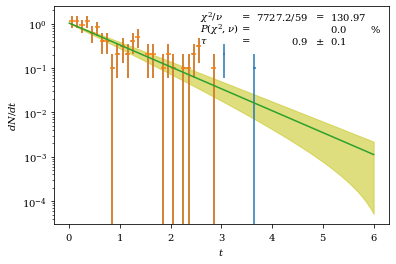

In [30]:
plot_hist(ya,xa,exa,eya,fmt='none')
plot_fit(x,y,ey,f,p,cov, pnames=[r'\tau'], data_kw=dict(fmt='none',xerr=ex))
yscale('log')
xlabel('$t$')
ylabel('$dN/dt$');

Til sammenligning laver vi en mindste kvadrat tilpasning af samme funktion til data. Her har vi brug for at finde den empiriske sandsynlighedsfordeling (et histogram), og tage vare på at vi ignorer hvor usikkerheden er mindre eller lig nul. 

In comparison, we make a least square fit of the same function to data. Here we need to find the empirical probability distribution (a histogram), and take care that we ignore where the uncertainty is less or equal to zero.

Mindste-kvadrat tilpasning af en eksponentiel funktion til data. 

The least-squares fit of an exponential function to the data.

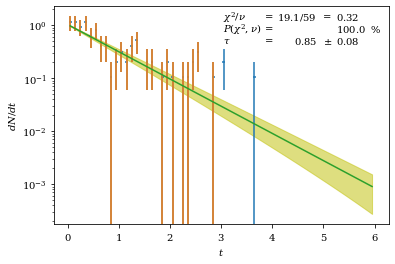

In [31]:
from scipy.optimize import curve_fit

p, cov = curve_fit(f,x[ey>0], y[ey>0], [1], ey[ey>0])
plot_hist(ya,xa,exa,eya,fmt='none')
plot_fit(x,y,ey,f,p,cov, pnames=[r'\tau'], data_kw=dict(fmt='none',xerr=ex))
yscale('log')
xlabel('$t$')
ylabel('$dN/dt$');

Vi ser at begge resultater er konsistente indenfor usikkerhederne, men også at $\chi^2$ sandsynligheden indikerer at vi har for lidt data (for store usikkerheder på data). 

We see that both results are consistent within the uncertainties, but also that the $\chi^2$ probability indicates that we have too little data (too large data uncertainties).

## Sandsynlighedsfunktion og mindste kvadrat 

## Likelihood function and least squares

### En lige linje

### A straight line

Lad os antage at vi har målt sammenhængende værdier 

$$(x_i,y_i)\quad,$$ 

og at $y_i$ er normalfordelt omkring den sande værdi $f(x_i)=a x_i + b$, altså 

$$y_i \sim \mathcal{N}(a x_i+b, \sigma)\quad.$$ 

Vi kan finde de maksimale sandsynlighed estimatorer (MLE) $\hat a, \hat b$ som oven over.  Vi har at sandsynlighedsfordelingen af $y_i$ er givet ved 

Suppose we have measured coherent values

$$(x_i,y_i)\quad,$$

and that $y_i$ is normally distributed around the true value of $f(x_i)=a x_i + b$, that is

$$y_i \sim \mathcal{N}(a x_i+b, \sigma)\quad.$$

We can find the maximum likelihood estimators (MLE) $\hat a, \hat b$ as above. We have that the probability distribution of $y_i$ is given

In [32]:
from sympy import sqrt as sysqrt, exp as syexp, pi as sypi

a, b, sigma = symbols('a b sigma',real=True)
i, N = symbols('i N',integer=True,positive=True)
x = IndexedBase('x')
y = IndexedBase('y')
f = 1/(sysqrt(2*sypi)*sigma)*syexp(-S.Half*(y[i]-a*x[i]-b)**2/sigma**2)
Eq(Function('f')(x),f)

Eq(f(x), sqrt(2)*exp(-(-a*x[i] - b + y[i])**2/(2*sigma**2))/(2*sqrt(pi)*sigma))

Lad os beregne den logaritmiske sandsynlighed givet $N$ sådanne målepunkter 

Let's calculate the log-likelihood given $N$ such measurement points

In [33]:
LL  = sylog(Product(f,(i,S.One,N)))
LL1 = LL.expand(log=True,force=True).doit().simplify()
Eq(ell(a),LL1)

Eq(ell(a), (-b**2/(2*sigma**2) - log(sigma) - log(pi)/2 - log(2)/2)*Sum(1, (i, 1, N)) + Sum(-a**2*x[i]**2/(2*sigma**2) - a*b*x[i]/sigma**2 + a*x[i]*y[i]/sigma**2 + b*y[i]/sigma**2 - y[i]**2/(2*sigma**2), (i, 1, N)))

Vi differenterer $\ell(a)$ med hensyn til $a$ og $b$, og sætter til nul for at finde vores maksimale sandsynligheds estimater 

We differentiate $\ell(a)$ with respect to $a$ and $b$, and set it to zero to find our maximum likelihood estimates

In [34]:
da = factor_terms(LL1.diff(a).expand())
Eq(da,0)

Eq((-a*Sum(x[i]**2, (i, 1, N)) - b*Sum(x[i], (i, 1, N)) + Sum(x[i]*y[i], (i, 1, N)))/sigma**2, 0)

In [35]:
db = factor_terms(LL1.diff(b).expand())
Eq(db,0)

Eq((-a*Sum(x[i], (i, 1, N)) - b*Sum(1, (i, 1, N)) + Sum(y[i], (i, 1, N)))/sigma**2, 0)

Ovenover erstatter vi summerne med gennemsnit og ser at 

Above we replace the sums with averages and see that

In [36]:
from sympy import Sum

xbar, ybar, xybar = symbols(r'\overline{x} \overline{y} \overline{xy}',real=True)
x2bar = symbols(r'\overline{x^2}',real=True)
da2 = da.subs({Sum(x[i]**2,  (i,S.One,N)):x2bar,
               Sum(x[i]*y[i],(i,S.One,N)):xybar,
               Sum(x[i],     (i,S.One,N)):xbar})
db2 = db.subs({Sum(x[i],     (i,S.One,N)):xbar*N,
               Sum(y[i],     (i,S.One,N)):ybar*N})
Eq(da2,db2,evaluate=False)

Eq((-\overline{x^2}*a + \overline{xy} - \overline{x}*b)/sigma**2, (-N*\overline{x}*a + N*\overline{y} - b*Sum(1, (i, 1, N)))/sigma**2)

hvilket vi løser for at finde $\hat a$ og $\hat b$, vores maksimale sandsynligheds estimater 

which we solve to find $\hat a$ and $\hat b$, our maximum likelihood estimates

In [37]:
hats = solve((da2,db2),a,b)

Vi finder

We find

In [38]:
Eq(Symbol('ahat'),hats[a].simplify())

Eq(ahat, (\overline{xy} - \overline{x}*\overline{y})/(\overline{x^2} - \overline{x}**2))

In [39]:
Eq(Symbol('bhat'), Eq(hats[b],(hats[b].ratsimp()
                               +xbar*hats[a]).simplify()
                               -xbar*Symbol('ahat'),
            evaluate=False))

Eq(bhat, Eq(-N*(\overline{x^2}*\overline{y} - \overline{xy}*\overline{x})/(-N*\overline{x^2} + N*\overline{x}**2), -\overline{x}*ahat + \overline{y}))

Vores løsninger $\hat a,\hat b$ er _de samme_ man finder som hvis man løser samme problem med en _mindste kvadrat metode_.   Sagt på en anden måde, For en lige linje 

$$y = ax+b\quad,$$ 
  
med data punkter 
  
$$\{(x_i,y_i)|i=1,\ldots,N\}\quad,$$ 
  
hvor det antages at $y_i \sim \mathcal{N}(ax_i+b,\sigma)$ er estimatorerne 

\begin{align*}
  \hat a 
  &= \frac{\overline{xy}-\overline{x}\,\overline{y}}{\overline{x^2}-\overline{x}^2} 
  &
  \hat b 
  &= \overline{y}-\hat a \overline{x}\quad,
\end{align*}

de samme for både maksimale sandsynligheds estimatorer og for mindste kvadrat estimatorer. 

Our solutions $\hat a,\hat b$ are _the same_ you find if you solve the same problem with a _least squares method_. Put another way, For a straight line

$$y = ax+b\quad,$$
  
with data points
  
$$\{(x_i,y_i)|i=1,\ldots,N\}\quad,$$
  
where it is assumed that $y_i \sim \mathcal{N}(ax_i+b,\sigma)$, the estimators

\begin{align*}
  \hat a 
  &= \frac{\overline{xy}-\overline{x}\,\overline{y}}{\overline{x^2}-\overline{x}^2} 
  &
  \hat b 
  &= \overline{y}-\hat a \overline{x}\quad,
\end{align*}

are the same for both maximum likelihood estimators and for least square estimators.

### En lige linje og indivduelle usikkerheder

Ovenover antog vi at måle punkterne var normal fordelt om en lige linje med _samme_ usikkerhed $\sigma$.  Hvis vi i stedet har 

$$\{(x_i,y_i,\delta_i)|i=1,\ldots,N\}\quad,$$ 

hvor hvert punkt har sin egen usikkerhed $\delta_i$ som ikke alle nødvendigvis er ens, så finder vi samme udtryk for $\hat a, \hat b$ dog hvor vi har erstattet alle gennemsnit med de _vægtede gennemsnit_ 

$$\overline{z}\rightarrow\overline{z}_w = 
\frac{\sum_{i=1}^{N}z_i/\sigma_i^2}{\sum_{i=1}^{N}1/\sigma_i^2}
\quad\text{for}\quad
z = x,y,xy,x^2\quad.
$$ 


### A straight line and individual uncertainties

Above, we assumed that the measured points were normally distributed over a straight line with _same_ uncertainty $\sigma$. If we have instead

$$\{(x_i,y_i,\delta_i)|i=1,\ldots,N\}\quad,$$

where each point has its own uncertainty $\delta_i$ which is not necessarily the same, then we find the same expression for $\hat a, \hat b$. However we have to replaced all averages with the _weighted averages_

$$\overline{z}\rightarrow\overline{z}_w = 
\frac{\sum_{i=1}^{N}z_i/\sigma_i^2}{\sum_{i=1}^{N}1/\sigma_i^2}
\quad\text{for}\quad
z = x,y,xy,x^2\quad.
$$

### Andre funktioner 

For lineære funktioner, det vil sige funktioner der kan skrives på formen 

$$f(x;\theta) = \sum_{i=1}^{N}\theta_i f_i(x)\qquad
\forall i,j:\ \frac{\partial f_i}{\partial \hat\theta_j}=0\quad,$$

gælder det ovenover i høj grad.  For _ikke_-lineære funktioner er det dog ikke så lige til.   

Hvis en ikke-lineær funktion $f$ er tilpas glat i et område omkring $x_i$ så at Taylor udviklingen 

\begin{align*}
f(x;\theta) 
&= \sum_{n=0}^{\infty}\frac{1}{n!}\frac{\partial^{n}f(x_i;\theta)}{\partial x^n}(x - x_i)^n 
\\
&\approx f(x_i;\theta)+\frac{\partial f(x_i;\theta)}{\partial x}(x - x_i) + \mathcal{O}(x-x_i)^2
\\
&\approx f(x_i;\theta)+\frac{\partial f(x_i;\theta)}{\partial x}(x - x_i)\quad,
\end{align*}

så kan vi opfatte funktionen som en lige linje nær $x_i$, og resultaterne ovenfra indikerer at mindste kvadrat estimatorene $\hat\theta$ af $\theta$ er gode estimatorer.  I næste kapitel vil vi bruge dette. 

### Other Functions

For linear functions, that is, functions that can be written on the form

$$f(x;\theta) = \sum_{i=1}^{N}p_i f_i(x)\qquad\forall i,j:\ \frac{\partial f_i}{\partial p_j}=0\quad,$$

the above it applies to a great extent. However, for _non_ linear functions, it is not so straightforward.

If a non-linear function $f$ is smooth in an area around $x_i$ so that the Taylor expansion

\begin{align*}
f(x;\theta) 
&= \sum_{n=0}^{\infty}\frac{1}{n!}\frac{\partial^{n}f(x_i;\theta)}{\partial x^n}(x - x_i)^n 
\\
&\approx f(x_i;\theta)+\frac{\partial f(x_i;\theta)}{\partial x}(x - x_i) + \mathcal{O}(x-x_i)^2
\\
&\approx f(x_i;\theta)+\frac{\partial f(x_i;\theta)}{\partial x}(x - x_i)\quad,
\end{align*}

then we can regard the function as a straight line near $x_i$, and the results from above indicate that the least square estimators $\hat \theta$ of $\theta$ are good estimators. In the next chapter we will use this.

## Opsummering 

Vi har set hvorledes vi definerer en _sandsynlighedsfunktion_ givet data 

$$X=\{x_i | i=1,\ldots,N\}\quad,$$

og en antagelse om disse datas sandsynlighedsfordeling

$$
X ~ f(\theta)\quad.
$$

Vi har også set hvorledes vi ved hjælp af dette begreb kan estimerer parametre værdier $\hat\theta$ ved at minimerer 

\begin{align*}
  -\ell(X;\theta) 
  &= -\log\mathcal{L}(X;\theta)\\
  &= -\log\prod_{i=1}^{N} f(X;\theta)\\
  &= -\sum_{i=1}^{N}\log f(X;\theta)\quad.
\end{align*}

Vi har skrevet en funktion `mlefit` som kan hjælpe os med at udfører disse estimater. 

Endelig har vi set at idéen om maksimal sandsynligheds estimat er tæt forbundet med estimater fra mindste kvadrat metoden. 

## Summary

We have seen how we define a _likelihood function_ given data

$$X=\{x_i | i=1,\ldots,N\}\quad,$$

and an assumption about the probability distribution of these data

$$
X ~ f(\theta)\quad.
$$

We have also seen how using this concept we can estimate parameters values $\hat\theta$ by minimizing

\begin{align*}
  -\ell(X;\theta) 
  &= -\log\mathcal{L}(X;\theta)\\
  &= -\log\prod_{i=1}^{N} f(X;\theta)\\
  &= -\sum_{i=1}^{N}\log f(X;\theta)\quad.
\end{align*}

We have written a function `mlefit` that can help us make these estimates.

Finally, we have seen that the idea of maximum likelihood estimation is closely related to estimates from the least squares method.

In [40]:
likelihood_ratio.__doc__ = \
"""Calculate the likelihood ratio of hypothesis H1 to H0

Parameters
---------- 
lh_h1 : float 
    (Logarithmic) likelihood of hypothesis H1 
lh_h0 : float 
    (Logarithmic) likelihood of hypothesis H0 
loglike : bool (optional, default True)
    If true, then lh_h1 and lh_h0 are assummed to be the logarithmic likelihood 
    of the hypothesis 
    
Returns 
------- 
lambda : float 
    The likelihood ratio 
    
        lambda = 2 log (lh_h1 / lh_h0) = 2 (log(lh_h1) - log(lh_h0))
    
    which is chi^2 distributed.  Use scipy.stats.chi2.sf with 2 degrees of freedom 
    to evaluate the p-value.  Large p-value says we cannot reject the null-hypothesis 
    H0 due to the hypothesis H1
"""

In [41]:
maximize_llh.__doc__ =\
"""Maximize a logarithmic likelihood function

Parameters
----------
f : callable 
    The (logarithmic) probability density function (PDF)
data : array-like, tuple (array-like,array-like)
    Data to evaluate f over 
p0 : array-like 
    Initial parameter values 
tomax : callable 
    Log-likelihood function of f, its parameters and data (not negative log-likelihood)
*args : tuple 
    Additional arguments for f 
lw : dict 
    Keyword arguments for `tomax` 
**kwargs : dict 
    Keyword arguments for minimizer 
    
Returns
-------
p : array-like 
    found parameter values 
cov : array-like 
    covariance matrix of parameters (inverse Hessian) 
opt : OptimizeResult (optional)
    full result from optimizer 
    
See also 
--------
mle_fit, llh, binned_llh, fit 
"""